In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
from shutil import copy
import similaritymeasures as sm 
import numpy as np
from obspy.geodetics import degrees2kilometers
import math

In [52]:
differences = pd.read_csv('data/differences.csv')

In [53]:
differences.head(10)

,Name,Frechet distance,Curve length measure,Area diff
0,lap1-0.csv,0.000055,0.000130,0.000006
1,lap1-1.csv,0.000055,0.000075,0.000005
2,lap1-10.csv,0.000052,0.000072,0.000006
3,lap1-11.csv,0.000053,0.000063,0.000005
4,lap1-12.csv,0.000062,0.000083,0.000004
5,lap1-13.csv,0.001480,0.000388,0.000005
6,lap1-14.csv,0.001495,0.000544,0.000004
7,lap1-15.csv,0.000064,0.000078,0.000004
8,lap1-16.csv,0.000056,0.000061,0.000005
9,lap1-17.csv,0.000052,0.000060,0.000005


<AxesSubplot:xlabel='Frechet distance', ylabel='Curve length measure'>

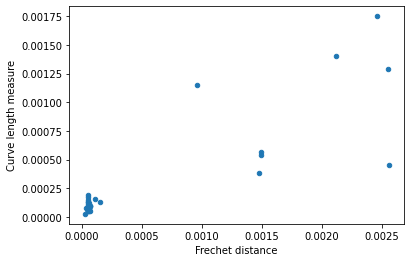

In [54]:
differences.plot.scatter(x='Frechet distance', y='Curve length measure')

<AxesSubplot:xlabel='Frechet distance', ylabel='Area diff'>

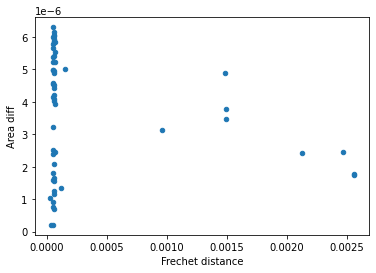

In [84]:
differences.plot.scatter(x='Frechet distance', y='Area diff')

<AxesSubplot:>

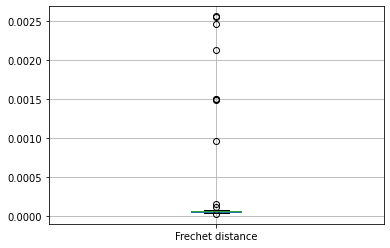

In [55]:
differences.boxplot(column=['Frechet distance'])

<AxesSubplot:>

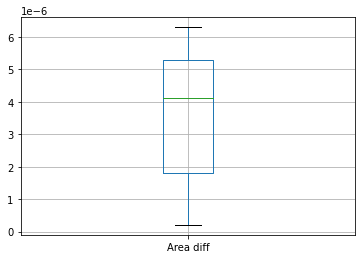

In [83]:
differences.boxplot(column=['Area diff'])

In [56]:
differences[(differences['Frechet distance'] > 0.0018) | (differences['Curve length measure'] > 0.00075)]

,Name,Frechet distance,Curve length measure,Area diff
40,lap2-14.csv,0.002462,0.001749,0.000002
41,lap2-15.csv,0.000957,0.001146,0.000003
42,lap2-16.csv,0.002553,0.001293,0.000002
54,lap3-3.csv,0.002120,0.001402,0.000002
55,lap3-4.csv,0.002558,0.000455,0.000002


In [57]:
differences[(differences['Frechet distance'] > 0.001) & (differences['Frechet distance'] < 0.002)]

,Name,Frechet distance,Curve length measure,Area diff
5,lap1-13.csv,0.001480,0.000388,0.000005
6,lap1-14.csv,0.001495,0.000544,0.000004
27,lap1-33.csv,0.001491,0.000569,0.000003


According to the graph, I would define two bounds for determing whether lap was unsuccessful. Frechet distance = **0.0010** and Curve length measure = **0.00025**.

In [58]:
totally_wrong_diff = differences[(differences['Frechet distance'] > 0.001) | (differences['Curve length measure'] > 0.00025)]
clean_diff = differences[(differences['Frechet distance'] < 0.001) & (differences['Curve length measure'] < 0.00025)]
clean_diff

,Name,Frechet distance,Curve length measure,Area diff
0,lap1-0.csv,0.000055,0.000130,6.168164e-06
1,lap1-1.csv,0.000055,0.000075,4.520562e-06
2,lap1-10.csv,0.000052,0.000072,5.660133e-06
3,lap1-11.csv,0.000053,0.000063,5.392902e-06
4,lap1-12.csv,0.000062,0.000083,4.078680e-06
7,lap1-15.csv,0.000064,0.000078,3.936585e-06
8,lap1-16.csv,0.000056,0.000061,5.415719e-06
9,lap1-17.csv,0.000052,0.000060,4.996330e-06
10,lap1-18.csv,0.000054,0.000073,4.139735e-06
11,lap1-19.csv,0.000053,0.000062,5.224191e-06


<AxesSubplot:xlabel='Frechet distance', ylabel='Curve length measure'>

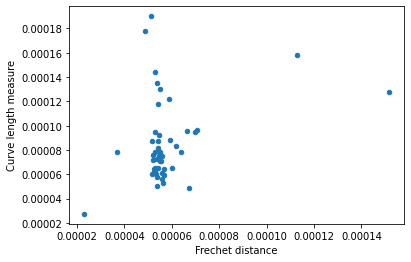

In [59]:
clean_diff.plot.scatter(x='Frechet distance', y='Curve length measure')

In [60]:
semi_wrong_diff = clean_diff[(clean_diff['Frechet distance']>0.00008) | (clean_diff['Curve length measure']>0.00015)]
semi_wrong_diff

,Name,Frechet distance,Curve length measure,Area diff
12,lap1-2.csv,0.000051,0.000190,0.000006
26,lap1-32.csv,0.000152,0.000128,0.000005
46,lap2-5.csv,0.000049,0.000178,0.000003
52,lap3-1.csv,0.000113,0.000158,0.000001


In [61]:
clean_diff = clean_diff[(clean_diff['Frechet distance'] < 0.00008) & (clean_diff['Curve length measure'] < 0.00015)]
clean_diff

,Name,Frechet distance,Curve length measure,Area diff
0,lap1-0.csv,0.000055,0.000130,6.168164e-06
1,lap1-1.csv,0.000055,0.000075,4.520562e-06
2,lap1-10.csv,0.000052,0.000072,5.660133e-06
3,lap1-11.csv,0.000053,0.000063,5.392902e-06
4,lap1-12.csv,0.000062,0.000083,4.078680e-06
7,lap1-15.csv,0.000064,0.000078,3.936585e-06
8,lap1-16.csv,0.000056,0.000061,5.415719e-06
9,lap1-17.csv,0.000052,0.000060,4.996330e-06
10,lap1-18.csv,0.000054,0.000073,4.139735e-06
11,lap1-19.csv,0.000053,0.000062,5.224191e-06


Bounds **0.00008** for Frechet distance and 0.00015 for Curve length measure may identify that there are some wrong measurements, but it is a rule.
Manual check is needed. 

In this case, only lap3-1.csv has strange measurements.

<AxesSubplot:>

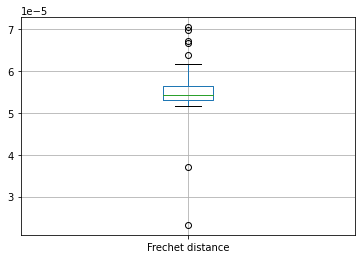

In [62]:
clean_diff.boxplot(column=['Frechet distance'])

In [63]:
differences['Frechet distance'].max()

0.0025583630019984328

In [64]:
differences['Frechet distance'].min()

2.3208619093530688e-05

In [65]:
differences['Curve length measure'].max()

0.001748810448831792

In [66]:
differences['Curve length measure'].min()

2.737076208247849e-05

In [67]:
degrees2kilometers(0.001748810448831792)

0.19445884957308895

In [68]:
degrees2kilometers(2.737076208247849e-05)

0.0030434898819668653

In [69]:
def create_curve(dataframe):
    curve = np.zeros((dataframe.shape[0], 2))
    curve[:, 0] = dataframe.LON
    curve[:, 1] = dataframe.LAT
    return curve

In [70]:

def init_dataframe(path):
    df = pd.read_csv(path, sep=',')
    return df


In [71]:
ref1 = init_dataframe('data/ref1.csv')
ideal_curve_ref1 = create_curve(ref1)
lap = init_dataframe('data/laps/lap1-0.csv')
experimental_curve = create_curve(lap)

In [74]:
sm.area_between_two_curves(ideal_curve_ref1, experimental_curve)

6.1681639635935426e-06

In [47]:
degrees2kilometers(6.1681639635935426e-06)

0.0006858685394633946

In [82]:
s = math.sqrt(6.1681639635935426e-06)
degrees2kilometers(s) ** 2

0.0762651019334428

In [11]:
laps_dir = 'data/laps'
for fileName in listdir(laps_dir):
    lap_dir = '{}/{}'.format(laps_dir, fileName)
    if fileName in clean_diff.Name.values:
        copy(lap_dir, 'data/laps_clean')
    elif fileName in semi_wrong_diff.Name.values:
        copy(lap_dir, 'data/laps_semi_wrong')
    else:
        copy(lap_dir, 'data/laps_wrong')